In [1]:
## read demographic data and freesurfer outputs
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
#reading freesurfer results
out_dir = Path("/output")
fig_dir = out_dir / "figs"
fsdata_file = out_dir / 'freesurfer_out.csv'
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
# read T1 images in mni space
abbas_jacobians_dir = out_dir / 'Abbas_Jacobians_mni'
sub_list = list(tab_data.index)
ds_jacobian = nio.DataGrabber(infields=['sub_id'])
ds_jacobian.inputs.base_directory = abbas_jacobians_dir # database
ds_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian-masked.nii.gz' # from cwd
ds_jacobian.inputs.sort_filelist = True
ds_jacobian.inputs.sub_id = sub_list
res_jacobian = ds_jacobian.run()
jacobian_list=res_jacobian.outputs.outfiles
tab_data["t1_mni"] = jacobian_list

201110-18:06:05,337 nipype.utils WARNING:
	 A newer version (1.5.1) of nipy/nipype is available. You are using 1.5.0


In [2]:
import nibabel as nib
import numpy as np
len(jacobian_list)
tab_data["t1_mni_data"] = [nib.load(x).get_fdata() for x in tab_data["t1_mni"]]
tab_data["t1_mni_data_vec"] = [np.reshape(x,-1) for x in tab_data["t1_mni_data"]]

In [54]:
#tab_data.boxplot(column=['Left-Hippocampus', 'Right-Hippocampus',
#                         'Left-Amygdala', 'Right-Amygdala'], grid=False)
d = tab_data
import statsmodels.api as sm
data = sm.datasets.scotland.load(as_pandas=False)
data.exog = sm.add_constant(d[['Left-Hippocampus', 'Right-Hippocampus', 'Left-Amygdala', 'Right-Amygdala']])
data.endog = sm.add_constant(d["diagnosis"])
gamma_model = sm.GLM(d["diagnosis"], d[["age", "sex", 'Left-Hippocampus', 'Right-Hippocampus', 'Left-Amygdala', 'Right-Amygdala']])
gamma_results = gamma_model.fit()
#print(gamma_results.summary())
#print(data.exog.shape, data.endog.shape)
tab_data.iloc[1,-1].

1847376.9671549427

(102, 4)


In [ ]:
from nilearn import plotting
TH=3
VMIN= 3; VMAX=6.5;
plotting.plot_glass_brain(a, title='sample brain', display_mode='lyrz',
                          black_bg=True, colorbar=True, plot_abs=False)

In [140]:
# distribution of large brain parts ratio
def lr_ratio(data, items_basic, items_single, items_lr):
    item_left   = [ "Left-"+x  for x in items_lr];
    item_right  = [ "Right-"+x for x in items_lr];
    items_all = items_single + item_left + item_right + items_lr;
    tmp_data = data[items_basic+items_single+item_left+item_right];
    for x in items_lr:
        tmp_data[x]  = tmp_data["Left-"+x] + tmp_data["Right-"+x]
    for x in items_all:
        tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"]  
    return tmp_data, items_basic+items_all

def plot_6(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def plot_6sex(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   hue="sex",split=True, inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   hue="sex",  split=True, inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))

['Hippocampus',
 'Amygdala',
 'Accumbens-area',
 'Hippocampus_r',
 'Amygdala_r',
 'Accumbens-area_r']

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Hippocampus', 'Amygdala', 'Accumbens-area']


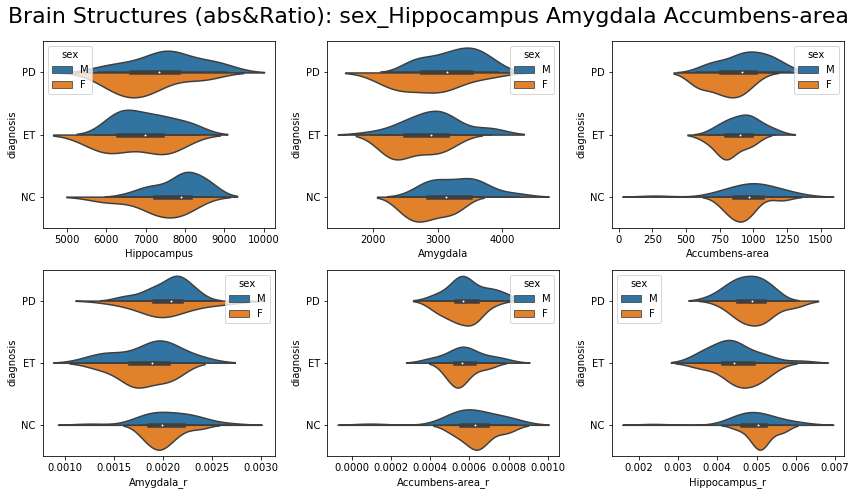

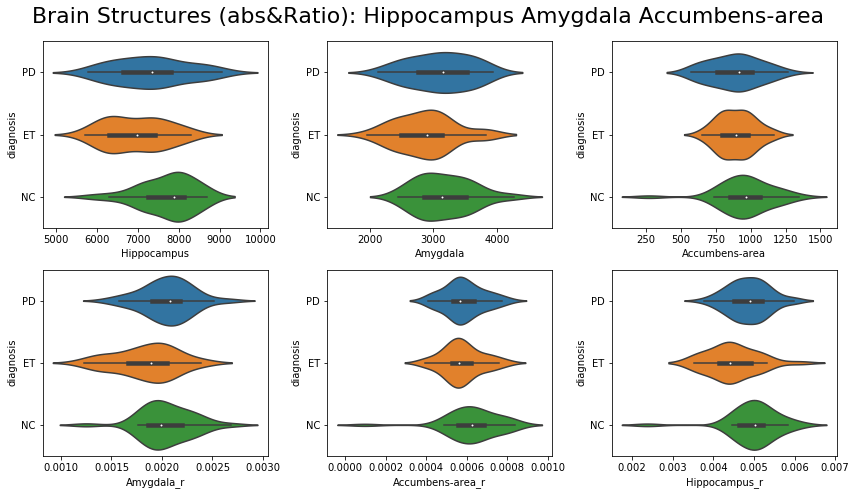

In [141]:
# "Hippocampus", "Amygdala", "Accumbens-area"
from matplotlib import pyplot as plt
import seaborn as sns
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_disp  = ["Hippocampus", "Amygdala", "Accumbens-area"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, [],items_disp);
print(items_all)
plot_6sex(tmp_data, items_disp+[x+"_r" for x in items_disp], "sex_"+" ".join(items_disp), 1)
plot_6(tmp_data, items_disp+[x+"_r" for x in items_disp], " ".join(items_disp), 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'Left-Caudate', 'Left-Pallidum', 'Left-Putamen', 'Right-Caudate', 'Right-Pallidum', 'Right-Putamen', 'Caudate', 'Pallidum', 'Putamen']


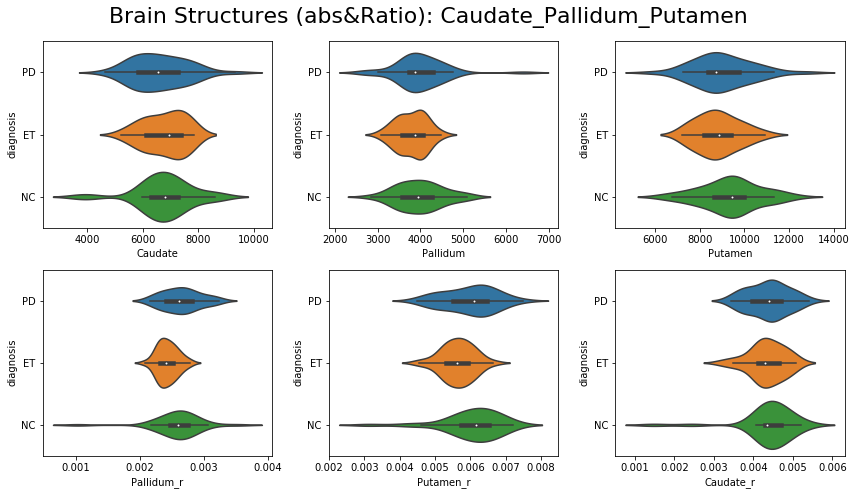

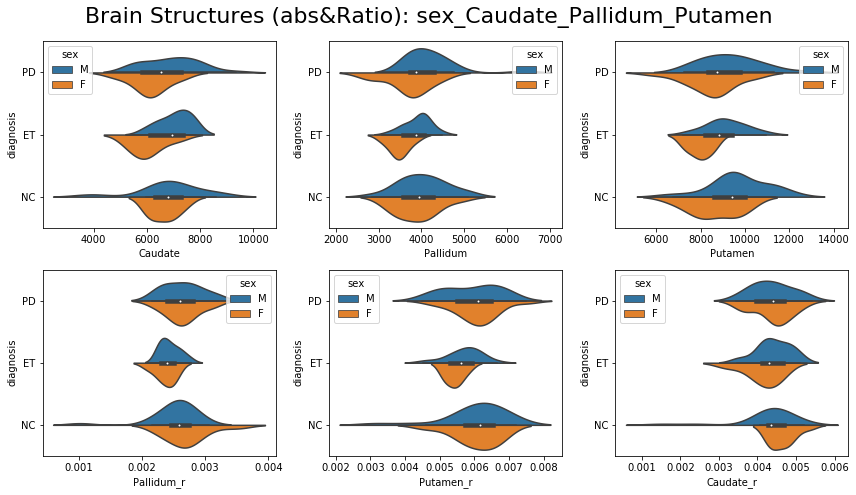

In [142]:
# "Caudate", "Pallidum", "Putamen"
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_disp  = ["Caudate", "Pallidum", "Putamen"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, [],items_disp);
print(items_all)
plot_6(tmp_data, items_disp+[x+"_r" for x in items_disp], "_".join(items_disp), 1)
plot_6sex(tmp_data, items_disp+[x+"_r" for x in items_disp],"sex_"+"_".join(items_disp), 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', '3rd-Ventricle', '4th-Ventricle', '5th-Ventricle', 'CSF', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Lateral-Ventricle']


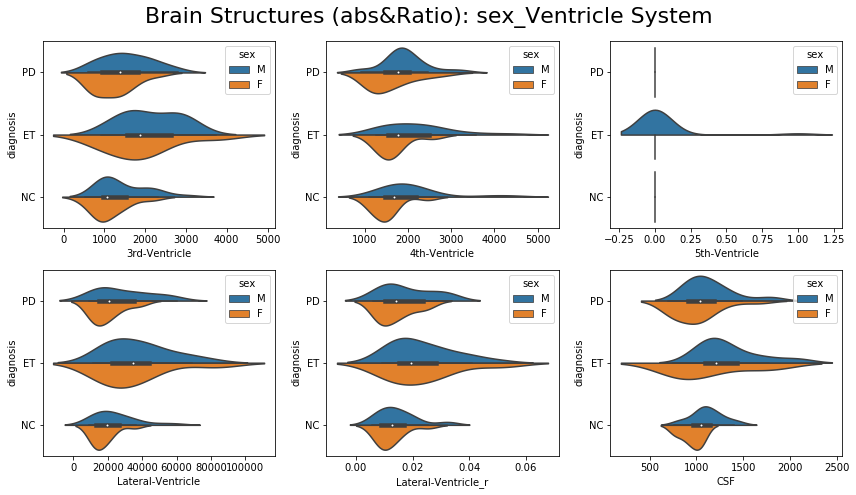

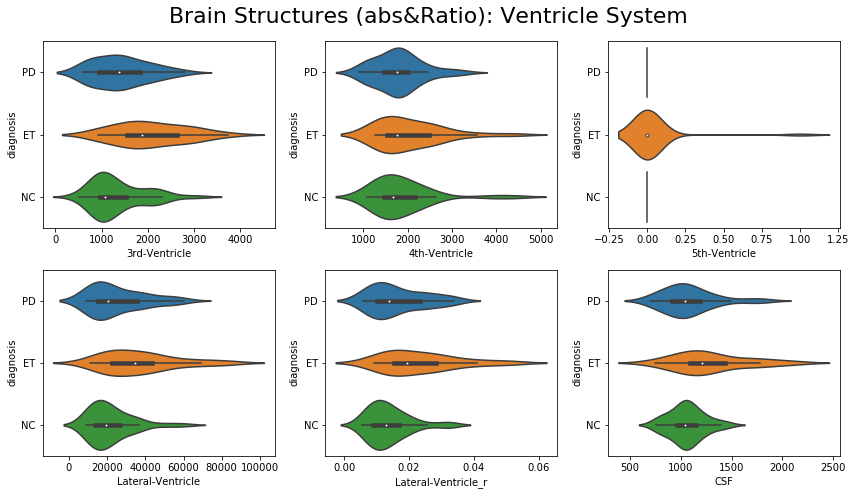

In [143]:
# Ventricle System, Left-Inf-Lat-Vent, 
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["3rd-Ventricle", "4th-Ventricle", "5th-Ventricle", "CSF"];
items_lr  = ["Lateral-Ventricle", "Inf-Lat-Vent"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
print(items_all)
plot_6sex(tmp_data, items_single+items_lr+[x+"_r" for x in items_lr], "sex_Ventricle System", 1)
plot_6(tmp_data, items_single+items_lr+[x+"_r" for x in items_lr], "Ventricle System", 1)

['diagnosis', 'age', 'sex', 'eTIV', '3rd-Ventricle', '4th-Ventricle', '5th-Ventricle', 'CSF', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Lateral-Ventricle']


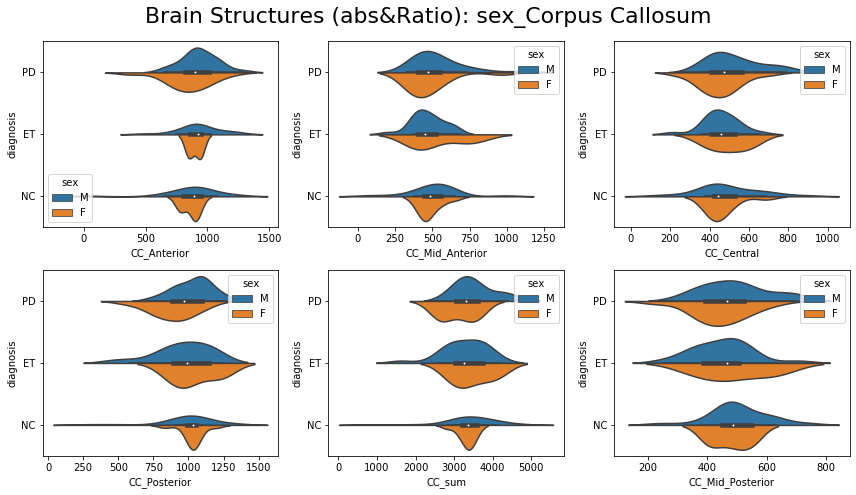

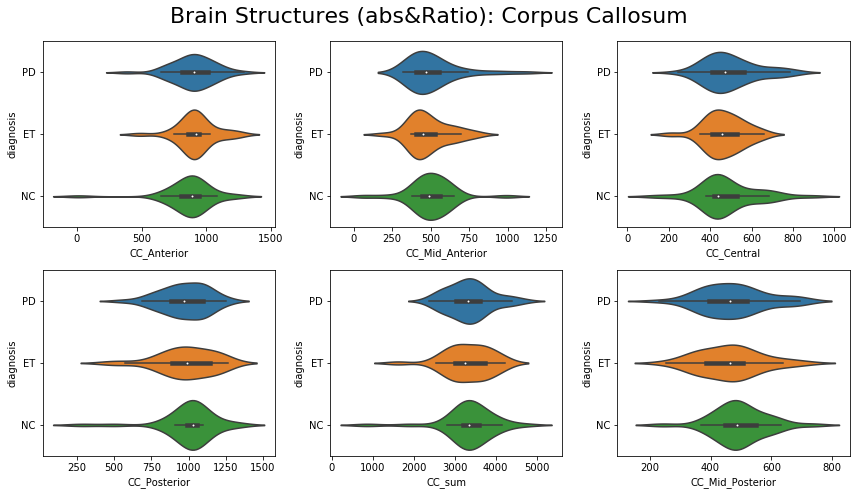

In [144]:
# Corpus Callosum
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CC_Anterior", "CC_Mid_Anterior", "CC_Central",
                 "CC_Mid_Posterior" ,"CC_Posterior", "CC_sum"];
#items_lr  = ["Thalamus-Proper"];
#lr_ratio(data, items_basic, items_single, items_lr)
#tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
tmp_data = tab_data
tmp_data[items_single[-1]] = tmp_data[items_single[0]]+tmp_data[items_single[1]]+tmp_data[items_single[2]]+tmp_data[items_single[3]]+tmp_data[items_single[4]]
print(items_all)
plot_6sex(tmp_data, items_single, "sex_Corpus Callosum", 1)
plot_6(tmp_data, items_single, "Corpus Callosum", 1)

['diagnosis', 'age', 'sex', 'eTIV', '3rd-Ventricle', '4th-Ventricle', '5th-Ventricle', 'CSF', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Lateral-Ventricle']


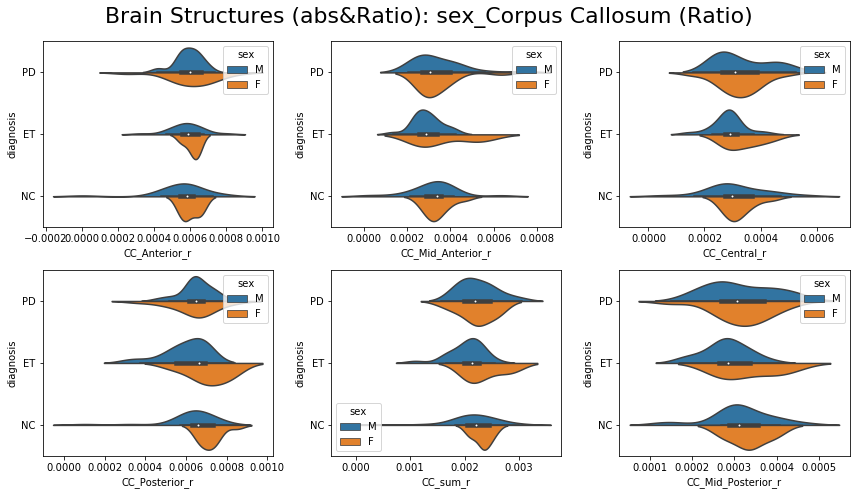

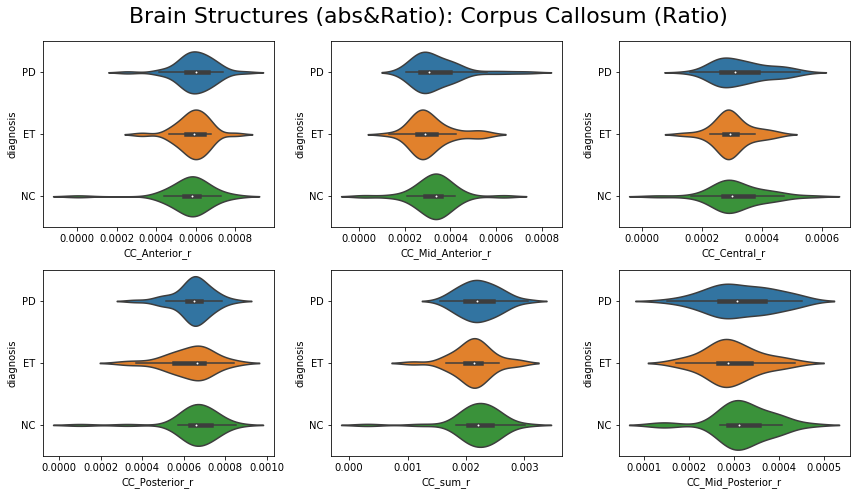

In [145]:
# Corpus Callosum Ratio
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CC_Anterior", "CC_Mid_Anterior", "CC_Central",
                 "CC_Mid_Posterior" ,"CC_Posterior", "CC_sum"];
#items_lr  = ["Thalamus-Proper"];
#lr_ratio(data, items_basic, items_single, items_lr)
#tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
tmp_data = tab_data
tmp_data[items_single[-1]] = tmp_data[items_single[0]]+tmp_data[items_single[1]]+tmp_data[items_single[2]]+tmp_data[items_single[3]]+tmp_data[items_single[4]]
for x in items_single:
    tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"] 
print(items_all)
plot_6sex(tmp_data, [x+"_r" for x in items_single], "sex_Corpus Callosum (Ratio)", 1)
plot_6(tmp_data, [x+"_r" for x in items_single], "Corpus Callosum (Ratio)", 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'CortexVol', 'Brain-Stem', 'Left-Cerebellum-Cortex', 'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex', 'Cerebellum-White-Matter']


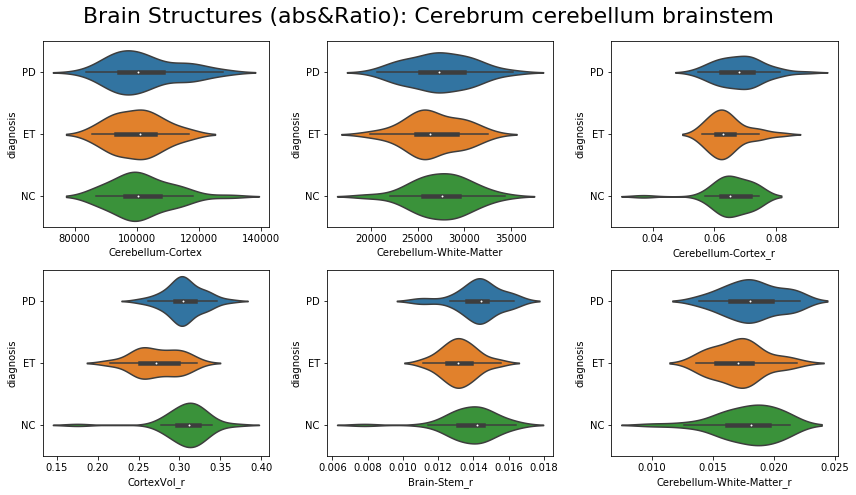

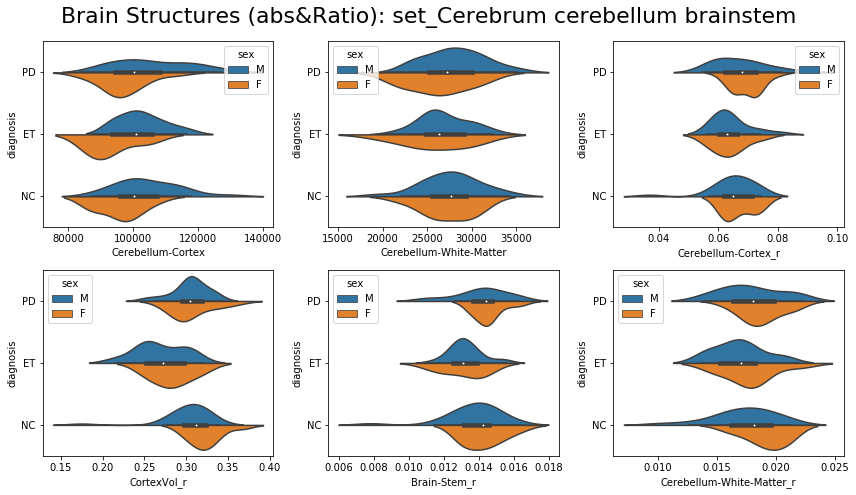

In [146]:
# Cerebrum cerebellum brainstem
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["CortexVol", "Brain-Stem"];
items_lr  = ["Cerebellum-Cortex", "Cerebellum-White-Matter"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
#tmp_data = tab_data
print(items_all)
plot_6(tmp_data, items_lr+[x+"_r" for x in items_lr+items_single],
       "Cerebrum cerebellum brainstem", 1)
plot_6sex(tmp_data, items_lr+[x+"_r" for x in items_lr+items_single],
       "set_Cerebrum cerebellum brainstem", 1)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['diagnosis', 'age', 'sex', 'eTIV', 'SubCortGrayVol', 'SupraTentorialVol', 'Left-Thalamus-Proper', 'Left-VentralDC', 'Right-Thalamus-Proper', 'Right-VentralDC', 'Thalamus-Proper', 'VentralDC']


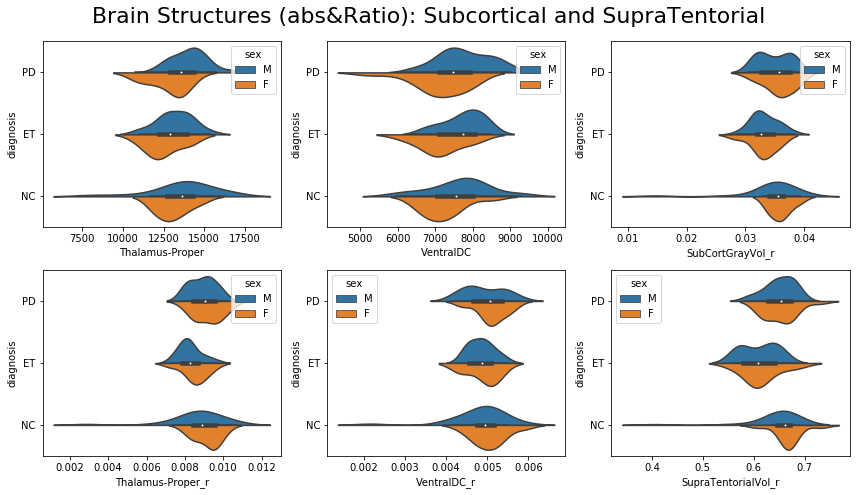

In [138]:
# Subcortical and SupraTentorial
items_basic = ["diagnosis", "age", "sex", "eTIV"];
items_single  = ["SubCortGrayVol", "SupraTentorialVol"];
items_lr  = ["Thalamus-Proper", "VentralDC"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
#tmp_data = tab_data
print(items_all)
plot_6(tmp_data, items_lr+[x+"_r" for x in items_single+items_lr], "Subcortical and SupraTentorial", 1)

In [ ]:
# 
